In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from balanced_kmeans import KMeans
from sklearn.decomposition import PCA #, TruncatedSVD
from sklearn import datasets

from cluster import *

/Users/darren/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


running k-means on cpu..


[running kmeans]: 3it [00:00, 418.65it/s, center_shift=0.000000, iteration=3, tol=0.001000]


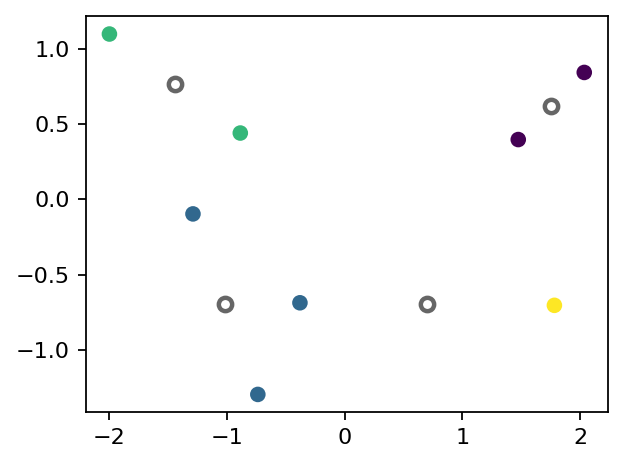

In [44]:
seed = 235
num_clusters = 4
balanced = True
debug = True
# set random seed
np.random.seed(seed)

n_samples = 8
blobs = datasets.make_blobs(n_samples=n_samples,
                            random_state=seed,
                            centers=[[1, 1], [-1, -1], [1, -1]],
                            cluster_std=0.6)
X = torch.from_numpy(blobs[0])
# X = torch.from_numpy(blobs[0][:n_samples//2])
# y = torch.from_numpy(blobs[0][n_samples//2:])

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

kmeans = KMeans(n_clusters=num_clusters, balanced=True)
# batched_X = batchify(X.to(device), batch_size=8)

counter = 0
_ = kmeans.fit(
    X=X, distance='euclidean', iter_limit=100, tqdm_flag=True, online=False
)


kmeans.save("model.pkl")
kmeans = kmeans.load("model.pkl")

cluster_ids_y_ = []

cluster_ids_y = kmeans.predict(
        # X=y.to(device)
        X = X.to(device)
    )

if balanced:
    output = 'balanced_clusters.pdf'
else:
    output = 'unbalanced_clusters.pdf'
plot_blobs(X, kmeans.cluster_centers.to('cpu'), cluster_ids_y, output)

In [45]:
# Display unique values and counts of cluster_ids_y
unique, counts = np.unique(cluster_ids_y, return_counts=True)

In [46]:
counts

array([2, 3, 2, 1])

In [19]:
unique

array([0, 1, 2, 4, 5, 6, 7])